In [2]:
import pandas as pd
import numpy as np
import keras
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
#1. Проведем предподготовку данных
dtrain = pd.read_csv('C:/Anaconda/lab5/train.csv')
dtest = pd.read_csv('C:/Anaconda/lab5/test.csv')
pixels = dtrain.columns.drop('label')
y_column = 'label'

In [5]:
dtrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Каждый пиксель задан числом от 0 до 255
#Для лучшей работы сети отнормируем значения
dtrain[pixels] = dtrain[pixels].applymap(lambda x: x / 255)

In [12]:
#Разделим датасеты и преобразуем к необходимому формату
from sklearn.model_selection import train_test_split
train, validation = train_test_split(dtrain, test_size=0.2)
x_train = train[pixels].values
y_train = train[y_column].values

x_val = validation[pixels].values
y_val = validation[y_column].values
y_train = y_train.reshape((y_train.shape[0], 1))
y_val = y_val.reshape((y_val.shape[0], 1))
print(x_train.shape, y_train.shape)

(33600, 784) (33600, 1)


In [13]:
#2. Обучение логистической регрессиии на scikit-learn
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(fit_intercept=True) # параметр multi_class по дефолту равен 'ovr' (один-против-всех), модель сама сделает one hot encoding для ответов 'label' (10 классов)
LRmodel.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_valid_predictions = LRmodel.predict(x_val)

In [15]:
metrics.accuracy_score(y_valid_predictions, y_val)

0.11297619047619048

In [16]:
#3. Создание модели многослойной нейронной сети в keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential() #создание модели
#добавление слоёв (количество нейронов, activation - функция активации, input_dim - число признаков)
model.add(Dense(64, activation='relu', input_dim=len(pixels))) #ReLU — преобразование max(x, 0),если x > 0, то оставляем x, а если x < 0, то заменяем на 0
model.add(Dense(10, activation='softmax')) #Softmax — это обобщение логистической функции для многомерного случая

In [17]:
#Перед тем, как начать тренировать модель, ее нужно скомпилировать (loss – функция потерь, optimizer – оптимизатор, metrics – список метрик оптимизации)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=400)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 2s 64us/step - loss: 2.3019 - acc: 0.1105 - val_loss: 2.3012 - val_acc: 0.1130
Epoch 2/10
33600/33600 [==============================] - 2s 63us/step - loss: 2.3014 - acc: 0.1112 - val_loss: 2.3010 - val_acc: 0.1130
Epoch 3/10
33600/33600 [==============================] - 2s 60us/step - loss: 2.3013 - acc: 0.1112 - val_loss: 2.3010 - val_acc: 0.1130
Epoch 4/10
33600/33600 [==============================] - 2s 73us/step - loss: 2.3013 - acc: 0.1112 - val_loss: 2.3010 - val_acc: 0.1130
Epoch 5/10
33600/33600 [==============================] - 2s 61us/step - loss: 2.3013 - acc: 0.1112 - val_loss: 2.3010 - val_acc: 0.1130
Epoch 6/10
33600/33600 [==============================] - 2s 68us/step - loss: 2.3012 - acc: 0.1112 - val_loss: 2.3010 - val_acc: 0.1130
Epoch 7/10
33600/33600 [==============================] - 2s 71us/step - loss: 2.3012 - acc: 0.1112 - val_loss: 2.3010 - val_acc:

In [19]:
predictions = model.predict_classes(dtest, verbose=0)

In [20]:
metrics.accuracy_score(LRmodel.predict(x_val), y_val)

0.11297619047619048

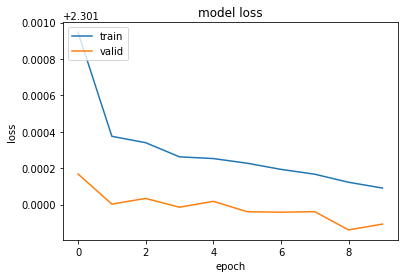

In [21]:
#4. Построение графика обучения

#уменьшение loss на каждой итерации
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()